In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

## IMPORTING DATASET

In [101]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Checking missing values

In [103]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

So there is no missing value in our dataset

## Seperate x and y values 

In [104]:
X=np.array(df['Hours']).reshape(-1,1)
y=df['Scores']

## Visualizing data

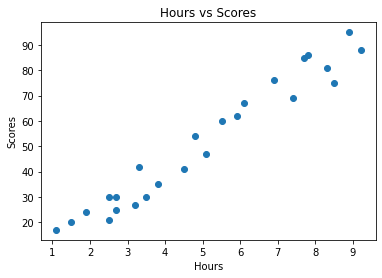

In [105]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

We can see that there is linear relationship between students' scores and hours they study

## Splitting dataset to training and testing

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


## Model for linear regression

In [108]:
from sklearn.linear_model import LinearRegression
model_reg=LinearRegression()

In [109]:
model_reg.fit(X_train, y_train)

LinearRegression()

In [110]:
#Intercept and coefficient values
B0=model_reg.intercept_
B1=model_reg.coef_

In [111]:
#linear regression model
Y0 = B0 + X_train*B1


## Visualizing linear model

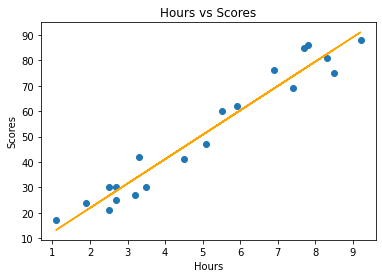

In [112]:
plt.scatter(X_train,y_train)
plt.plot(X_train, Y0, color='orange')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Making prediction in test data

In [113]:
y_pred=model_reg.predict(X_test)

In [114]:
#comparing predicited values with actual values
y_test_list=list(y_test)
y_pred_list=list(y_pred)
df_compare=pd.DataFrame({"True value": y_test_list, "Prediction": y_pred})
df_compare

,True value,Prediction
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


## Visualizing on test data

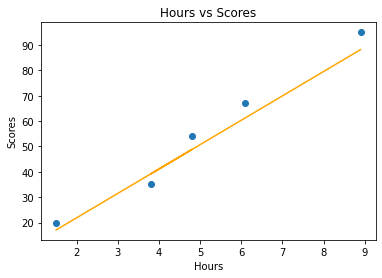

In [115]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color='orange')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Evaluating of the regression model

In [116]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9605221627526419


Our r2_score is 0.96 which means that our model is good fitm

## Making prediction for 9.25 hours

In [117]:
result=model_reg.predict([[9.25]])
result

array([91.51128762])

## As a conclusion, if the student studies for 9.25 hours he will score 91.5


## THE END